# S3 и распределение по папкам

In [ ]:
!pip install boto3

import boto3
import os

# Настройка клиента S3
session = boto3.session.Session()
s3_client = session.client(
    service_name='s3',
    region_name='ru-central1',
    endpoint_url='',
    aws_access_key_id='',
    aws_secret_access_key=''
)

bucket_name = 'retinopatyml'
folder_name = 'b1gbqcgk1bfajrkrfdfr/all_images/'
local_folder = 'all_images'

# Создание локальной папки, если она не существует
os.makedirs(local_folder, exist_ok=True)

# Получение списка всех объектов в папке
objects = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)

# Загрузка каждого файла по отдельности
for obj in objects.get('Contents', []):
    file_key = obj['Key']
    file_name = file_key.split('/')[-1]

    # Полный путь для сохранения файла
    local_file_path = os.path.join(local_folder, file_name)

    # Скачивание файла
    s3_client.download_file(bucket_name, file_key, local_file_path)
    print(f"Downloaded {file_key} to {local_file_path}")


Downloaded b1gbqcgk1bfajrkrfdfr/all_images/dataset.csv to all_images/dataset.csv
Downloaded b1gbqcgk1bfajrkrfdfr/all_images/healthy/09449cbf-c007-486c-8ebf-6495fd439804.1.jpg to all_images/09449cbf-c007-486c-8ebf-6495fd439804.1.jpg
Downloaded b1gbqcgk1bfajrkrfdfr/all_images/healthy/09449cbf-c007-486c-8ebf-6495fd439804.10.jpg to all_images/09449cbf-c007-486c-8ebf-6495fd439804.10.jpg
Downloaded b1gbqcgk1bfajrkrfdfr/all_images/healthy/09449cbf-c007-486c-8ebf-6495fd439804.11.jpg to all_images/09449cbf-c007-486c-8ebf-6495fd439804.11.jpg
Downloaded b1gbqcgk1bfajrkrfdfr/all_images/healthy/09449cbf-c007-486c-8ebf-6495fd439804.12.jpg to all_images/09449cbf-c007-486c-8ebf-6495fd439804.12.jpg
Downloaded b1gbqcgk1bfajrkrfdfr/all_images/healthy/09449cbf-c007-486c-8ebf-6495fd439804.13.jpg to all_images/09449cbf-c007-486c-8ebf-6495fd439804.13.jpg
Downloaded b1gbqcgk1bfajrkrfdfr/all_images/healthy/09449cbf-c007-486c-8ebf-6495fd439804.14.jpg to all_images/09449cbf-c007-486c-8ebf-6495fd439804.14.jpg
Dow

In [13]:
import os

# Проверка количества файлов в локальной папке
local_folder = 'all_images'
files = os.listdir(local_folder)
file_count = len(files)

print(f"Количество файлов в папке '{local_folder}': {file_count}")

# Проверка наличия файла dataset.csv
if 'dataset.csv' in files:
    print("Файл dataset.csv найден в папке.")
else:
    print("Файл dataset.csv не найден в папке.")


Количество файлов в папке 'all_images': 878
Файл dataset.csv найден в папке.


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Параметры
csv_file = 'all_images/dataset.csv'  # Путь к CSV-файлу
train_file = 'train_data.csv'  # Имя файла для обучающей выборки
test_file = 'test_data.csv'  # Имя файла для тестовой выборки
test_size = 0.3  # Доля тестовой выборки

# Чтение CSV файла
data = pd.read_csv(csv_file)

# Разделение на обучающую и тестовую выборки
train_data, test_data = train_test_split(data, test_size=test_size, random_state=42)

# Сохранение выборок в новые CSV файлы
train_data.to_csv(train_file, index=False)
test_data.to_csv(test_file, index=False)

print("Данные успешно разделены на train и test и сохранены в файлы!")


Данные успешно разделены на train и test и сохранены в файлы!


In [15]:
import os
import pandas as pd
import shutil

# Параметры
train_file = 'train_data.csv'  # Имя файла для обучающей выборки
test_file = 'test_data.csv'  # Имя файла для тестовой выборки
images_dir = 'all_images'  # Папка с исходными изображениями
train_dir = '/content/data/train'  # Папка для обучающих данных
test_dir = '/content/data/test'  # Папка для тестовых данных

# Чтение данных из файлов
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Перемещение изображений в соответствующие папки для обучающей выборки
for _, row in train_data.iterrows():
    image_name = row['image']  # Замените 'filename' на имя вашего столбца с названиями изображений
    class_label = row['class']  # Замените 'class' на имя вашего столбца с метками классов

    # Создание пути к папке класса
    class_dir = os.path.join(train_dir, str(class_label))
    os.makedirs(class_dir, exist_ok=True)

    # Перемещение изображения
    source = os.path.join(images_dir, image_name)
    destination = os.path.join(class_dir, image_name)
    shutil.move(source, destination)

# Перемещение изображений в соответствующие папки для тестовой выборки
for _, row in test_data.iterrows():
    image_name = row['image']  # Замените 'filename' на имя вашего столбца с названиями изображений
    class_label = row['class']  # Замените 'class' на имя вашего столбца с метками классов

    # Создание пути к папке класса
    class_dir = os.path.join(test_dir, str(class_label))
    os.makedirs(class_dir, exist_ok=True)

    # Перемещение изображения
    source = os.path.join(images_dir, image_name)
    destination = os.path.join(class_dir, image_name)
    shutil.move(source, destination)

print("Изображения успешно перемещены в соответствующие папки!")


Изображения успешно перемещены в соответствующие папки!


удаление багованного файла

In [16]:
import os

file_path = '/content/data/test/0/09449cbf-c007-486c-8ebf-6495fd439804.8.jpg'

# Проверка, существует ли файл, и удаление
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Файл {file_path} удалён.")
else:
    print(f"Файл {file_path} не найден.")


Файл /content/data/test/0/09449cbf-c007-486c-8ebf-6495fd439804.8.jpg удалён.


# Импорт библиотек

In [38]:
import os
import shutil
import time
import zipfile
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import warnings
from PIL import Image, ImageFile
from tqdm import tqdm, trange
from sklearn.metrics import precision_score, recall_score, accuracy_score


from torch.utils.data import Dataset, DataLoader, random_split
from torch.cuda import amp
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder
import torchvision

import matplotlib.pyplot as plt
from collections import Counter

# Игнорировать предупреждения
warnings.filterwarnings("ignore")
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [39]:
MEAN = (0.485, 0.456, 0.406)
STD = (0.229, 0.224, 0.225)
BATCH_SIZE = 8
NUM_CLASSES = 2  # Healthy & Not Healthy

In [40]:
# Определение трансформаций для изображений
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD)
])

In [41]:
TRAIN_DATA_PATH = '/content/data/train'
TEST_DATA_PATH = '/content/data/test'


In [42]:
checkpoint_path_train = os.path.join(TRAIN_DATA_PATH, '.ipynb_checkpoints')
checkpoint_path_test = os.path.join(TEST_DATA_PATH, '.ipynb_checkpoints')

if os.path.exists(checkpoint_path_train):
    shutil.rmtree(checkpoint_path_train)

if os.path.exists(checkpoint_path_test):
    shutil.rmtree(checkpoint_path_test)

In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [44]:
# функция проверки допустимости файлов
def is_valid_file(filename):
    return filename.endswith(('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp'))

In [45]:
# Загрузка обучающих данных с фильтрацией недопустимых файлов
train_data = ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG, is_valid_file=is_valid_file)
test_data = ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG, is_valid_file=is_valid_file)

# Train, Validation и Test загрузчики данных
train_size = int(0.9 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size, val_size])

dataloader_train = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
dataloader_valid = DataLoader(dataset=val_data, batch_size=BATCH_SIZE, shuffle=True)
dataloader_test = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

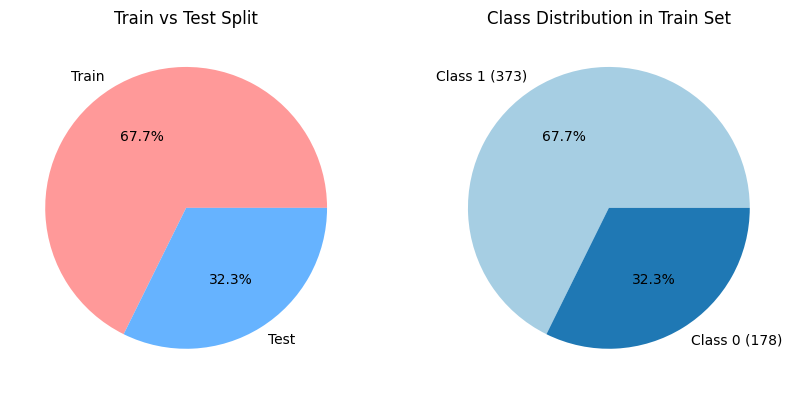

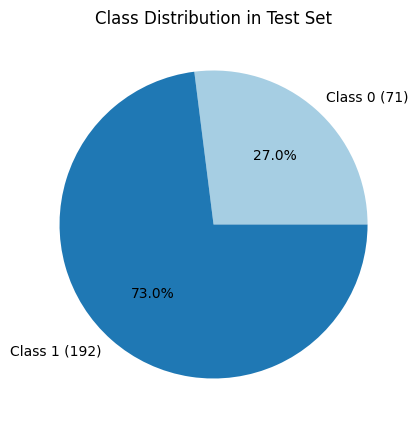

In [46]:
# Подсчёт количества изображений в наборах train и test по классам
train_class_counts = Counter([label for _, label in train_data])
test_class_counts = Counter([label for _, label in test_data])

# Данные для круговой диаграммы
train_size = len(train_data)
test_size = len(test_data)
total_size = train_size + test_size
train_ratio = train_size / total_size
test_ratio = test_size / total_size

# Построение круговой диаграммы для соотношения train и test
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie([train_ratio, test_ratio], labels=['Train', 'Test'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title("Train vs Test Split")

# Подсчёт соотношения классов внутри train и test наборов
train_labels = [f'Class {key} ({count})' for key, count in train_class_counts.items()]
test_labels = [f'Class {key} ({count})' for key, count in test_class_counts.items()]

# Построение круговой диаграммы для классов в train
plt.subplot(1, 2, 2)
plt.pie(train_class_counts.values(), labels=train_labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Class Distribution in Train Set")

# Отображение круговых диаграмм
plt.show()

# Построение диаграммы для классов в test
plt.figure(figsize=(5, 5))
plt.pie(test_class_counts.values(), labels=test_labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Class Distribution in Test Set")
plt.show()


# обучение модели

In [24]:
# Загрузка предварительно обученной модели ViT
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=NUM_CLASSES)
model.to(device)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [26]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Настройте learningRate по необходимости

NameError: name 'model' is not defined

In [25]:
def train_model(learningRate, num_epochs):
    # Установка оптимизатора с текущей скоростью обучения
    optimizer = optim.Adam(model.parameters(), lr=learningRate)

    # Цикл обучения
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        all_labels = []
        all_predictions = []

        for inputs, labels in tqdm(dataloader_train, desc=f'Training Epoch {epoch+1}/{num_epochs}'):
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(inputs).logits  # Выходы модели
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

        # Средняя потеря за эпоху
        epoch_loss = running_loss / len(dataloader_train.dataset)
        precision = precision_score(all_labels, all_predictions, average='weighted')
        recall = recall_score(all_labels, all_predictions, average='weighted')
        accuracy = accuracy_score(all_labels, all_predictions)

        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, "
              f"Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}")

    # Сохранение модели
    torch.save(model.state_dict(), f'model_{learningRate}.pth')

    # Оценка модели
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader_valid, desc='Validation'):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs).logits
                _, predicted = torch.max(outputs, 1)
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())


    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"Validation Results - Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}")

In [27]:
# Пример вызова функции обучения
train_model(learningRate=1e-4, num_epochs=10)

Training Epoch 1/10: 100%|██████████| 69/69 [17:58<00:00, 15.63s/it]


Epoch 1/10, Training Loss: 0.1701, Recall: 0.9456, Precision: 0.9457, Accuracy: 0.9456


Training Epoch 2/10: 100%|██████████| 69/69 [18:15<00:00, 15.88s/it]


Epoch 2/10, Training Loss: 0.1071, Recall: 0.9601, Precision: 0.9601, Accuracy: 0.9601


Training Epoch 3/10: 100%|██████████| 69/69 [18:08<00:00, 15.77s/it]


Epoch 3/10, Training Loss: 0.0991, Recall: 0.9673, Precision: 0.9676, Accuracy: 0.9673


Training Epoch 4/10: 100%|██████████| 69/69 [18:09<00:00, 15.80s/it]


Epoch 4/10, Training Loss: 0.0656, Recall: 0.9764, Precision: 0.9765, Accuracy: 0.9764


Training Epoch 5/10: 100%|██████████| 69/69 [18:15<00:00, 15.87s/it]


Epoch 5/10, Training Loss: 0.0896, Recall: 0.9746, Precision: 0.9746, Accuracy: 0.9746


Training Epoch 6/10: 100%|██████████| 69/69 [18:13<00:00, 15.85s/it]


Epoch 6/10, Training Loss: 0.0705, Recall: 0.9746, Precision: 0.9746, Accuracy: 0.9746


Training Epoch 7/10: 100%|██████████| 69/69 [18:19<00:00, 15.94s/it]


Epoch 7/10, Training Loss: 0.0262, Recall: 0.9909, Precision: 0.9909, Accuracy: 0.9909


Training Epoch 8/10: 100%|██████████| 69/69 [18:08<00:00, 15.78s/it]


Epoch 8/10, Training Loss: 0.0180, Recall: 0.9927, Precision: 0.9927, Accuracy: 0.9927


Training Epoch 9/10: 100%|██████████| 69/69 [18:08<00:00, 15.78s/it]


Epoch 9/10, Training Loss: 0.0310, Recall: 0.9909, Precision: 0.9910, Accuracy: 0.9909


Training Epoch 10/10: 100%|██████████| 69/69 [18:12<00:00, 15.83s/it]


Epoch 10/10, Training Loss: 0.0593, Recall: 0.9855, Precision: 0.9859, Accuracy: 0.9855


Validation: 100%|██████████| 8/8 [00:41<00:00,  5.14s/it]

Validation Results - Recall: 0.9839, Precision: 0.9842, Accuracy: 0.9839


In [28]:
# Функция тестирования модели
def evaluate_model(dataloader, phase="Test"):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc=f'{phase}'):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs).logits
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"{phase} Results - Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}")

# Пример вызова функции тестирования
evaluate_model(dataloader_test, "Test")

Test: 100%|██████████| 33/33 [02:55<00:00,  5.31s/it]

Test Results - Recall: 0.9696, Precision: 0.9700, Accuracy: 0.9696


# обучение с замороженным слоем

In [47]:
# Загрузка предварительно обученной модели ViT
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=NUM_CLASSES)
model.to(device)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [48]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Настройте learningRate по необходимости

In [49]:
model.classifir = nn.Sequential(
    nn.Linear(model.classifier.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, NUM_CLASSES)
)

model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [50]:
from sklearn.model_selection import KFold

# Функция для тренировки модели с использованием k-fold кросс-валидации
def train_model_kfold(learningRate, num_epochs, n_splits=5):
    # Установка оптимизатора с текущей скоростью обучения
    optimizer = optim.Adam(model.parameters(), lr=learningRate)

    for param in model.parameters():
        param.requires_grad = True

    # Настройка k-fold
    kfold = KFold(n_splits=n_splits, shuffle=True)
    fold = 0

    # Цикл по фолдам
    for train_idx, valid_idx in kfold.split(train_data):
        fold += 1
        print(f'Fold {fold}/{n_splits}')

        # Подразделение данных для текущего фолда
        train_subset = torch.utils.data.Subset(train_data, train_idx)
        valid_subset = torch.utils.data.Subset(train_data, valid_idx)

        # Создание даталоадеров для обучающего и валидационного подмножеств
        dataloader_train = DataLoader(dataset=train_subset, batch_size=BATCH_SIZE, shuffle=True)
        dataloader_valid = DataLoader(dataset=valid_subset, batch_size=BATCH_SIZE, shuffle=False)

        # Цикл обучения для каждого фолда
        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            all_labels = []
            all_predictions = []

            for inputs, labels in tqdm(dataloader_train, desc=f'Training Epoch {epoch+1}/{num_epochs}, Fold {fold}'):
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(inputs).logits  # Выходы модели
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

            # Средняя потеря за эпоху
            epoch_loss = running_loss / len(dataloader_train.dataset)
            precision = precision_score(all_labels, all_predictions, average='weighted')
            recall = recall_score(all_labels, all_predictions, average='weighted')
            accuracy = accuracy_score(all_labels, all_predictions)

            print(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, "
                  f"Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}")

        # Валидация модели на текущем фолде
        model.eval()
        evaluate_model(dataloader_valid, phase=f'Validation Fold {fold}')

    # Сохранение модели после k-fold
    torch.save(model.state_dict(), f'model_{learningRate}_kfold.pth')

# Функция для оценки модели
def evaluate_model(dataloader, phase="Test"):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc=f'{phase}'):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs).logits
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"{phase} Results - Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}")




In [51]:
# Пример вызова функции обучения с k-fold кросс-валидацией
train_model_kfold(learningRate=1e-4, num_epochs=5, n_splits=3)

Fold 1/3


Training Epoch 1/5, Fold 1: 100%|██████████| 46/46 [11:36<00:00, 15.13s/it]


Fold 1, Epoch 1/5, Training Loss: 0.3387, Recall: 0.8556, Precision: 0.8549, Accuracy: 0.8556


Training Epoch 2/5, Fold 1: 100%|██████████| 46/46 [11:22<00:00, 14.83s/it]


Fold 1, Epoch 2/5, Training Loss: 0.1082, Recall: 0.9700, Precision: 0.9701, Accuracy: 0.9700


Training Epoch 3/5, Fold 1: 100%|██████████| 46/46 [11:22<00:00, 14.85s/it]


Fold 1, Epoch 3/5, Training Loss: 0.1071, Recall: 0.9591, Precision: 0.9591, Accuracy: 0.9591


Training Epoch 4/5, Fold 1: 100%|██████████| 46/46 [11:23<00:00, 14.87s/it]


Fold 1, Epoch 4/5, Training Loss: 0.1066, Recall: 0.9673, Precision: 0.9673, Accuracy: 0.9673


Training Epoch 5/5, Fold 1: 100%|██████████| 46/46 [11:25<00:00, 14.90s/it]


Fold 1, Epoch 5/5, Training Loss: 0.0294, Recall: 0.9973, Precision: 0.9973, Accuracy: 0.9973


Validation Fold 1: 100%|██████████| 23/23 [01:57<00:00,  5.10s/it]


Validation Fold 1 Results - Recall: 0.9620, Precision: 0.9619, Accuracy: 0.9620
Fold 2/3


Training Epoch 1/5, Fold 2: 100%|██████████| 46/46 [11:22<00:00, 14.84s/it]


Fold 2, Epoch 1/5, Training Loss: 0.0986, Recall: 0.9755, Precision: 0.9754, Accuracy: 0.9755


Training Epoch 2/5, Fold 2: 100%|██████████| 46/46 [11:24<00:00, 14.88s/it]


Fold 2, Epoch 2/5, Training Loss: 0.0429, Recall: 0.9864, Precision: 0.9864, Accuracy: 0.9864


Training Epoch 3/5, Fold 2: 100%|██████████| 46/46 [11:23<00:00, 14.87s/it]


Fold 2, Epoch 3/5, Training Loss: 0.0562, Recall: 0.9782, Precision: 0.9782, Accuracy: 0.9782


Training Epoch 4/5, Fold 2: 100%|██████████| 46/46 [11:27<00:00, 14.95s/it]


Fold 2, Epoch 4/5, Training Loss: 0.0453, Recall: 0.9891, Precision: 0.9891, Accuracy: 0.9891


Training Epoch 5/5, Fold 2: 100%|██████████| 46/46 [11:26<00:00, 14.92s/it]


Fold 2, Epoch 5/5, Training Loss: 0.0639, Recall: 0.9809, Precision: 0.9809, Accuracy: 0.9809


Validation Fold 2: 100%|██████████| 23/23 [01:59<00:00,  5.21s/it]


Validation Fold 2 Results - Recall: 0.9891, Precision: 0.9891, Accuracy: 0.9891
Fold 3/3


Training Epoch 1/5, Fold 3: 100%|██████████| 46/46 [11:33<00:00, 15.08s/it]


Fold 3, Epoch 1/5, Training Loss: 0.0287, Recall: 0.9864, Precision: 0.9864, Accuracy: 0.9864


Training Epoch 2/5, Fold 3: 100%|██████████| 46/46 [11:29<00:00, 14.99s/it]


Fold 3, Epoch 2/5, Training Loss: 0.0907, Recall: 0.9647, Precision: 0.9647, Accuracy: 0.9647


Training Epoch 3/5, Fold 3: 100%|██████████| 46/46 [11:31<00:00, 15.03s/it]


Fold 3, Epoch 3/5, Training Loss: 0.0129, Recall: 0.9973, Precision: 0.9973, Accuracy: 0.9973


Training Epoch 4/5, Fold 3: 100%|██████████| 46/46 [11:28<00:00, 14.98s/it]


Fold 3, Epoch 4/5, Training Loss: 0.0038, Recall: 1.0000, Precision: 1.0000, Accuracy: 1.0000


Training Epoch 5/5, Fold 3: 100%|██████████| 46/46 [11:27<00:00, 14.95s/it]


Fold 3, Epoch 5/5, Training Loss: 0.0031, Recall: 1.0000, Precision: 1.0000, Accuracy: 1.0000


Validation Fold 3: 100%|██████████| 23/23 [01:57<00:00,  5.10s/it]


Validation Fold 3 Results - Recall: 1.0000, Precision: 1.0000, Accuracy: 1.0000


In [52]:
# Пример вызова функции тестирования
evaluate_model(dataloader_test, "Test")

Test: 100%|██████████| 33/33 [02:50<00:00,  5.16s/it]

Test Results - Recall: 0.9886, Precision: 0.9887, Accuracy: 0.9886
